In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random


In [3]:
df=pd.read_csv('miami1.csv')
df1=pd.read_csv('miami.csv')
df2=pd.read_csv('Key_bisyacne.csv')
df3=pd.read_csv('brickel.csv')
df4=pd.read_csv('Data.csv')
lat_long=pd.read_csv('miami_lat_long_geocod.csv')
elevation=pd.read_csv('elevation data.txt',sep='\t', header=None)
miami_final=pd.read_excel('Miami_final_offical.xlsx')


In [4]:
df.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,...,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10738929,Active,5980 N Bay Rd,6,9,2.0,32500000,NaN,09/18/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,26,Miami-Dade County,02-32-15-003-0190,09/18/2019 2:00:16 PM,NaN,NaN
1,A10580401,Active,5004 N Bay Rd,8,9,1.0,26500000,NaN,12/03/2018 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,315,Miami-Dade County,02-32-15-003-2080,12/06/2018 11:46:48 AM,NaN,NaN
2,A10488686,Active,5565/5589 Pine Tree Dr,10,13,1.0,23990000,NaN,06/30/2018 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,471,Miami-Dade County,02-32-14-003-0290,06/30/2018 11:01:03 AM,NaN,NaN
3,A10561804,Active,100 La Gorce Circle,7,9,1.0,22500000,NaN,11/09/2018 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,339,Miami-Dade County,02-32-11-006-0040,11/09/2018 6:31:32 PM,NaN,NaN
4,A10423492,Active,6385 Pinetree Drive Cir,9,11,2.0,22500000,NaN,02/22/2018 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,599,Miami-Dade County,02-32-11-013-0010,02/22/2018 11:34:10 AM,NaN,NaN


In [5]:
df1.head()

,Unnamed: 0,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,...,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,0,A10738929,Active,5980 N Bay Rd,6,9,2.0,32500000,NaN,09/18/2019 12:00:00 AM,...,NaN,NaN,NaN,NaN,26,Miami-Dade County,02-32-15-003-0190,09/18/2019 2:00:16 PM,NaN,NaN
1,1,A10580401,Active,5004 N Bay Rd,8,9,1.0,26500000,NaN,12/03/2018 12:00:00 AM,...,NaN,NaN,NaN,NaN,315,Miami-Dade County,02-32-15-003-2080,12/06/2018 11:46:48 AM,NaN,NaN
2,2,A10488686,Active,5565/5589 Pine Tree Dr,10,13,1.0,23990000,NaN,06/30/2018 12:00:00 AM,...,NaN,NaN,NaN,NaN,471,Miami-Dade County,02-32-14-003-0290,06/30/2018 11:01:03 AM,NaN,NaN
3,3,A10561804,Active,100 La Gorce Circle,7,9,1.0,22500000,NaN,11/09/2018 12:00:00 AM,...,NaN,NaN,NaN,NaN,339,Miami-Dade County,02-32-11-006-0040,11/09/2018 6:31:32 PM,NaN,NaN
4,4,A10423492,Active,6385 Pinetree Drive Cir,9,11,2.0,22500000,NaN,02/22/2018 12:00:00 AM,...,NaN,NaN,NaN,NaN,599,Miami-Dade County,02-32-11-013-0010,02/22/2018 11:34:10 AM,NaN,NaN


In [6]:
df2.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,...,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10626407,Active,28 Harbor Pt,7,8,1.0,25000000,NaN,02/25/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,231,Miami-Dade County,24-52-06-001-0020,02/25/2019 1:40:27 PM,NaN,NaN
1,A10728109,Active,9 Harbor Pt,8,8,3.0,19500000,NaN,08/22/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,53,Miami-Dade County,24-42-32-002-0282,08/22/2019 4:25:08 PM,NaN,NaN
2,A10643662,Active,430 N Mashta Dr,6,7,1.0,19500000,NaN,03/22/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,206,Miami-Dade County,24-52-05-017-0050,03/22/2019 1:18:52 PM,NaN,NaN
3,A10643797,Active,350 Harbor Dr,7,8,1.0,18000000,NaN,03/26/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,202,Miami-Dade County,24-42-32-006-0070,03/27/2019 1:05:11 PM,NaN,NaN
4,A10237695,Active,260 HARBOR DR,6,7,2.0,14900000,NaN,03/02/2017 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,956,Miami-Dade County,24-42-32-006-0150,03/08/2017 11:25:39 AM,NaN,NaN


In [7]:
df3.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,...,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,R10532890,Active,1435 Brickell Avenue,3,3,1.0,1395000,NaN,05/22/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,145,Miami-Dade County,01-41-39-078-0780,05/23/2019 12:45:54 PM,NaN,NaN
1,A10753606,Active,167 SW 20th Rd,4,4,0.0,1199000,NaN,10/08/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,6,Miami-Dade County,01-41-38-001-3670,10/08/2019 9:43:37 PM,NaN,NaN
2,A10726379,Active,1644 S Miami Ave,6,7,NaN,1190000,NaN,08/19/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,56,Miami-Dade County,01-41-39-012-0010,08/19/2019 11:56:03 PM,NaN,NaN
3,A10359452,Active,1435 Brickell Ave,2,2,1.0,1180000,NaN,09/18/2017 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,756,Miami-Dade County,01-41-39-078-0790,10/20/2017 12:36:38 PM,NaN,NaN
4,A10704606,Active,237 SW 20th Rd,5,3,0.0,1100000,NaN,07/10/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,96,Miami-Dade County,01-41-38-001-2570,07/11/2019 12:29:20 PM,NaN,NaN


In [8]:
df4.head()

,MLS NUMBER,STATUS,ADDRESS,BEDS,FBATHS,HBATHS,LIST PRICE,SOLD PRICE,CONTRACT,SETTLED,...,EXPIRATION DATE,PENDING DATE,OFF MARKET DATE,SALE TERMS,DAYS ON MARKET,COUNTY,APN,ENTRY DATE,SELLER CONTRIBUTIONS (Y/N),SELLER CONTRIBUTIONS ($)
0,A10597515,Active,46 Star Island Dr,10,10,2.0,39950000,NaN,01/10/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,277,Miami-Dade County,02-42-04-001-0410,01/10/2019 2:54:36 PM,NaN,NaN
1,A10743716,Active,2920 N Bay Rd,6,7,1.0,35000000,NaN,09/25/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,19,Miami-Dade County,02-32-27-008-0420,09/25/2019 11:52:07 AM,NaN,NaN
2,A10643045,Active,1 Star Island Dr,8,7,1.0,32000000,NaN,03/21/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,207,Miami-Dade County,02-42-04-001-0010,03/21/2019 1:06:57 PM,NaN,NaN
3,A10728350,Active,29 Star Island Dr,6,7,2.0,29000000,NaN,08/23/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,52,Miami-Dade County,02-42-04-001-0240,09/05/2019 3:37:53 PM,NaN,NaN
4,A10663159,Active,30 PALM AV,8,8,1.0,29000000,NaN,05/07/2019 12:00:00 AM,NaN,...,NaN,NaN,NaN,NaN,160,Miami-Dade County,02-42-05-001-0260,05/07/2019 3:21:29 PM,NaN,NaN


In [9]:
frames=[df,df1,df2,df3,df4]
miami= pd.concat(frames)
pd.set_option('display.max_columns',100)
miami.shape

/Users/talalagedeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(8994, 81)

In [10]:
miami.columns

Index(['ADDRESS', 'APN', 'APPROX LOT SIZE', 'ASSOC FEE PAID PER',
       'ASSOCIATION FEE', 'BEDS', 'BLDG UNITS', 'CITY', 'COMPLEX',
       'COMPLEX UNITS', 'CONST', 'CONTRACT', 'COOLING', 'COUNTY',
       'DAYS ON MARKET', 'DESIGN1', 'DESIGN2', 'DEVELOPMENT NAME', 'DINING',
       'ENTRY DATE', 'EST TAXES', 'EXPECTED CLOSING DATE', 'EXPIRATION DATE',
       'EXT FEAT', 'FBATHS', 'FEE DESCRIPTION', 'FLOORS', 'GAR DESC',
       'GAR SPACES', 'HBATHS', 'HEAT', 'INT FEAT', 'LAND LEASE', 'LIST PRICE',
       'LIV SQFT', 'LOT DESC', 'LOT SIZE', 'MAINT CHARGE', 'MAINT INCL',
       'MIN LEASE', 'MLS NUMBER', 'MSTR BATH', 'OFF MARKET DATE', 'OTHER ROOM',
       'PARKING', 'PENDING DATE', 'PHOTO COUNT', 'POOL DIM', 'POOL1', 'POOL2',
       'PUBLIC REMARKS', 'REC LEASE', 'REO', 'RESTRICTIONS', 'ROOF', 'ROOF.1',
       'SALE TERMS', 'SECURITY INFO', 'SELLER CONTRIBUTIONS ($) ',
       'SELLER CONTRIBUTIONS (Y/N)', 'SETTLED', 'SEWER', 'SHORT SALE',
       'SOLD PRICE', 'SPA', 'STATUS', 'STYLE', '

In [11]:
# Dropping unwanted information
miami=miami.drop(['MLS NUMBER','STATUS','SETTLED','TOT SQFT','LIV SQFT',
            'DESIGN1','DESIGN2','HEAT','COOLING','GAR SPACES','PARKING','GAR DESC',
            'DINING','EXT FEAT','FLOORS', 'INT FEAT', 'LOT DESC', 'POOL2',
            'POOL DIM', 'ROOF', 'OTHER ROOM', 'SEWER','WATER', 'WINDOWS','SPA', 
            'POOL1', 'MSTR BATH', 'STYLE','SHORT SALE', 'REO', 'BLDG UNITS', 
            'COMPLEX UNITS', 'UNIT FLOOR LOC','TOTAL FLOORS', 'SUBDIVISION INFO',
            'SECURITY INFO', 'RESTRICTIONS','FEE DESCRIPTION', 'ASSOC FEE PAID PER', 
            'MAINT CHARGE', 'LAND LEASE','REC LEASE', 'ASSOCIATION FEE', 'MIN LEASE', 
            'MAINT INCL','DEVELOPMENT NAME', 'COMPLEX', 'UNIT #', 'ROOF.1', 'PUBLIC REMARKS',
            'EXPECTED CLOSING DATE', 'APPROX LOT SIZE','PHOTO COUNT','WITHDRAWN DATE', 
            'EXPIRATION DATE', 'PENDING DATE', 'OFF MARKET DATE','SALE TERMS', 'DAYS ON MARKET','APN', 
            'ENTRY DATE','SELLER CONTRIBUTIONS (Y/N)', 'SELLER CONTRIBUTIONS ($) ','Unnamed: 0','VIEW','SUBDIV'],axis=1)







In [12]:
miami.shape

(8994, 15)

In [13]:
miami.dtypes

ADDRESS        object
BEDS            int64
CITY           object
CONST          object
CONTRACT       object
COUNTY         object
EST TAXES       int64
FBATHS          int64
HBATHS        float64
LIST PRICE      int64
LOT SIZE      float64
SOLD PRICE    float64
SUBD INFO      object
YEAR BUILT      int64
ZIP CODE       object
dtype: object

In [14]:
miami.isna().sum()

ADDRESS          0
BEDS             0
CITY             0
CONST            0
CONTRACT         0
COUNTY           0
EST TAXES        0
FBATHS           0
HBATHS        1529
LIST PRICE       0
LOT SIZE      4689
SOLD PRICE    1897
SUBD INFO     1242
YEAR BUILT       0
ZIP CODE         0
dtype: int64

In [15]:
miami.head()

,ADDRESS,BEDS,CITY,CONST,CONTRACT,COUNTY,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,SUBD INFO,YEAR BUILT,ZIP CODE
0,5980 N Bay Rd,6,Miami Beach,Concrete Block Construction,09/18/2019 12:00:00 AM,Miami-Dade County,188036,9,2.0,32500000,43615.0,NaN,LA GORCE GOLF SUB,2015,33140
1,5004 N Bay Rd,8,Miami Beach,"Elevated Construction, New Construction",12/03/2018 12:00:00 AM,Miami-Dade County,256084,9,1.0,26500000,21517.0,NaN,LA GORCE GOLF SUB,2016,33140
2,5565/5589 Pine Tree Dr,10,Miami Beach,Cbs Construction,06/30/2018 12:00:00 AM,Miami-Dade County,153260,13,1.0,23990000,83548.0,NaN,BEACH VIEW SUB,1925,33140
3,100 La Gorce Circle,7,Miami Beach,Cbs Construction,11/09/2018 12:00:00 AM,Miami-Dade County,281368,9,1.0,22500000,77748.0,NaN,LA GORCE ISLAND,1952,33141
4,6385 Pinetree Drive Cir,9,Miami Beach,Cbs Construction,02/22/2018 12:00:00 AM,Miami-Dade County,284598,11,2.0,22500000,43763.0,NaN,BEACH VIEW ADDITION,1937,33141


In [16]:
# Filling NA with 0's
miami['HBATHS']=miami['HBATHS'].fillna(0)

In [17]:
miami.nunique() 

ADDRESS       4085
BEDS            14
CITY            15
CONST          150
CONTRACT      1655
COUNTY           3
EST TAXES     3971
FBATHS          16
HBATHS           6
LIST PRICE    1376
LOT SIZE       912
SOLD PRICE    1314
SUBD INFO      989
YEAR BUILT     106
ZIP CODE        47
dtype: int64

In [18]:
# Finding Sum to Calculate South Miami Real Estate % to total market
miami.sum()

ADDRESS       5980 N Bay Rd5004 N Bay Rd5565/5589 Pine Tree ...
BEDS                                                      31107
CITY          Miami BeachMiami BeachMiami BeachMiami BeachMi...
CONST         Concrete Block ConstructionElevated Constructi...
CONTRACT      09/18/2019 12:00:00 AM12/03/2018 12:00:00 AM06...
COUNTY        Miami-Dade CountyMiami-Dade CountyMiami-Dade C...
EST TAXES                                             191127593
FBATHS                                                    26886
HBATHS                                                     3412
LIST PRICE                                          20194068237
LOT SIZE                                            4.60447e+07
SOLD PRICE                                          1.19129e+10
YEAR BUILT                                             17638670
dtype: object

In [19]:
miami['CONTRACT'] = df['CONTRACT'].astype('datetime64[ns]') 

In [20]:
# Extracting Year from Contract Column
miami_final['year'] = miami_final['CONTRACT'].dt.year 


In [21]:
print('Miami Real Estate %', ((20194068237)/(33000000000000))*100)

Miami Real Estate % 0.06119414617272727


In [22]:
miami.describe()

,BEDS,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,YEAR BUILT
count,8994.000000,8.994000e+03,8994.000000,8994.000000,8.994000e+03,4305.000000,7.097000e+03,8994.000000
mean,3.458639,2.125057e+04,2.989326,0.379364,2.245282e+06,10695.636237,1.678578e+06,1961.159662
std,1.605863,6.959046e+04,1.703046,0.580801,3.845203e+06,12408.299541,2.859661e+06,28.485526
min,0.000000,0.000000e+00,0.000000,0.000000,1.750000e+03,0.000000,2.200000e+02,1902.000000
25%,3.000000,4.057500e+03,2.000000,0.000000,4.989250e+05,7125.000000,4.300000e+05,1939.000000
50%,3.000000,8.557000e+03,3.000000,0.000000,9.490000e+05,8100.000000,7.850000e+05,1951.000000
75%,4.000000,1.938200e+04,4.000000,1.000000,2.200000e+06,11188.000000,1.675000e+06,1980.000000
max,13.000000,3.137615e+06,22.000000,5.000000,5.500000e+07,481632.000000,4.700000e+07,2021.000000


In [25]:
miami.corr()

,BEDS,EST TAXES,FBATHS,HBATHS,LIST PRICE,LOT SIZE,SOLD PRICE,YEAR BUILT
BEDS,1.000000,0.237567,0.860435,0.431124,0.579720,0.284588,0.562127,0.112679
EST TAXES,0.237567,1.000000,0.274906,0.196387,0.372724,0.389784,0.283555,0.111718
FBATHS,0.860435,0.274906,1.000000,0.444891,0.677315,0.297777,0.660731,0.252276
HBATHS,0.431124,0.196387,0.444891,1.000000,0.461245,0.189114,0.457031,0.293628
LIST PRICE,0.579720,0.372724,0.677315,0.461245,1.000000,0.412077,0.995167,0.286902
LOT SIZE,0.284588,0.389784,0.297777,0.189114,0.412077,1.000000,0.705195,0.063643
SOLD PRICE,0.562127,0.283555,0.660731,0.457031,0.995167,0.705195,1.000000,0.288232
YEAR BUILT,0.112679,0.111718,0.252276,0.293628,0.286902,0.063643,0.288232,1.000000


In [26]:
miami_final=miami_final.drop(['Unnamed: 0','SOLD PRICE','SUBD INFO'],axis=1)
miami_final['ALTITUDE'].replace('#REF!',np.nan,inplace=True)

In [27]:
miami_final.isna().sum()

ADDRESS          0
LATITUDE         0
LONGITUDE        0
ALTITUDE      8076
BEDS             0
CITY             0
CONST            0
CONTRACT         0
COUNTY           0
EST TAXES        0
FBATHS           0
HBATHS           0
LIST PRICE       0
LOT SIZE      4689
YEAR BUILT       0
ZIP CODE         0
year             0
dtype: int64

In [28]:
dummy = miami_final.dropna(subset=['ALTITUDE'])
lst = dummy['ALTITUDE']
len(lst)

918

In [29]:
miami_final['ALTITUDE'] = miami_final['ALTITUDE'].astype('float32')
miami_final.dtypes

ADDRESS               object
LATITUDE             float64
LONGITUDE            float64
ALTITUDE             float32
BEDS                   int64
CITY                  object
CONST                 object
CONTRACT      datetime64[ns]
COUNTY                object
EST TAXES              int64
FBATHS                 int64
HBATHS                 int64
LIST PRICE             int64
LOT SIZE             float64
YEAR BUILT             int64
ZIP CODE              object
year                   int64
dtype: object

In [30]:
miami_final['ALTITUDE'] = miami_final['ALTITUDE'].apply(lambda x: np.random.choice(lst) if np.isnan(x) else x)
miami_final.ALTITUDE.value_counts()

13.9                    1440
5.0                     1385
7.1                      727
0.3                      722
3.6                      259
5.0                      161
13.899999618530273       160
3.3                      148
2.6                      131
1.0                      126
0.4                      121
3.0                      117
3.1                      107
2.9                       89
2.0                       86
2.4                       85
7.099999904632568         85
3.8                       82
0.30000001192092896       81
1.1                       79
0.9                       77
1.5                       76
3.4                       74
8.5                       72
1.8                       72
1.4                       71
2.8                       67
2.2                       58
1.3                       56
0.8                       54
                        ... 
1.899999976158142          2
4.099999904632568          2
12.100000381469727         2
6.0           

In [31]:
miami_final['LOT SIZE'].fillna((miami_final['LOT SIZE'].mean()), inplace=True)
miami_final['LOT SIZE'].value_counts()

10695.636237    4689
7500.000000      384
10500.000000      96
5000.000000       72
7140.000000       66
6250.000000       64
6750.000000       58
7000.000000       56
9000.000000       54
8250.000000       48
6000.000000       46
7200.000000       42
7320.000000       38
7700.000000       36
8000.000000       36
12500.000000      34
10125.000000      34
10400.000000      32
5900.000000       32
6900.000000       30
10000.000000      28
6450.000000       28
9375.000000       28
7800.000000       26
9750.000000       26
9600.000000       24
15000.000000      24
5750.000000       22
5400.000000       22
8100.000000       22
                ... 
6957.000000        2
24534.000000       2
2000.000000        2
16752.000000       2
13711.000000       2
16362.000000       2
43615.000000       2
9920.000000        2
6412.000000        2
25410.000000       2
13984.000000       2
14094.000000       2
58332.000000       2
9363.000000        2
7666.000000        2
12189.000000       2
10962.000000 

In [32]:
miami_final['ALTITUDE']=miami_final['ALTITUDE'].astype('float64')
miami_final.dtypes

ADDRESS               object
LATITUDE             float64
LONGITUDE            float64
ALTITUDE             float64
BEDS                   int64
CITY                  object
CONST                 object
CONTRACT      datetime64[ns]
COUNTY                object
EST TAXES              int64
FBATHS                 int64
HBATHS                 int64
LIST PRICE             int64
LOT SIZE             float64
YEAR BUILT             int64
ZIP CODE              object
year                   int64
dtype: object

In [33]:
miami_final1=miami_final[['LATITUDE','LONGITUDE','ALTITUDE','LIST PRICE','LOT SIZE','EST TAXES','year']]


In [34]:
kmeans = KMeans(n_clusters=4)
census_clusters = kmeans.fit(miami_final1)
census_clusters.cluster_centers_

array([[ 2.57777568e+01, -8.01523767e+01,  5.50934256e+00,
         5.27770473e+06,  1.21956827e+04,  4.74416730e+04,
         2.01676125e+03],
       [ 2.57841583e+01, -8.01508806e+01,  5.87606060e+00,
         1.38413120e+07,  1.84759107e+04,  1.05314958e+05,
         2.01722121e+03],
       [ 2.57986378e+01, -8.01217114e+01,  5.84243810e+00,
         9.89940718e+05,  9.86349898e+03,  1.19043578e+04,
         2.01663967e+03],
       [ 2.57942509e+01, -8.01447679e+01,  6.02894737e+00,
         2.85285421e+07,  3.54706339e+04,  1.71814421e+05,
         2.01702632e+03]])

In [35]:
# Sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

1.3787388462581512e+16

In [36]:
miami_final1['Cluster'] = census_clusters.fit_predict(miami_final1)


/Users/talalagedeon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
pd.pivot_table(miami_final1,index='Cluster')

,ALTITUDE,EST TAXES,LATITUDE,LIST PRICE,LONGITUDE,LOT SIZE,year
Cluster,,,,,,,
0,5.842438,11904.357777,25.798638,9.899407e+05,-80.121711,9863.498977,2016.639666
1,5.876061,105314.957576,25.784158,1.384131e+07,-80.150881,18475.910700,2017.221212
2,6.028947,171814.421053,25.794251,2.852854e+07,-80.144768,35470.633945,2017.026316
3,5.509343,47441.673010,25.777757,5.277705e+06,-80.152377,12195.682705,2016.761246


In [38]:
miami_final1.Cluster.value_counts()

0    7432
3    1156
1     330
2      76
Name: Cluster, dtype: int64

In [67]:
from sklearn.cluster import AgglomerativeClustering

census_sample = miami_final1.sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
census_hier = hier_clust.fit(census_sample)

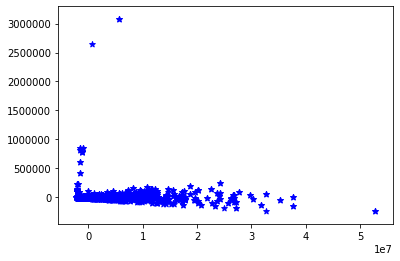

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

dbscan = DBSCAN()
dbscan.fit(miami_final1)

pca = PCA(n_components=3).fit(miami_final1)
pca_2d = pca.transform(miami_final1)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')



In [72]:
miami_final1.describe()

,LATITUDE,LONGITUDE,ALTITUDE,LIST PRICE,LOT SIZE,EST TAXES,year,Cluster
count,8994.000000,8994.000000,8994.000000,8.994000e+03,8994.000000,8.994000e+03,8994.000000,8994.000000
mean,25.795386,-80.126918,5.802435,2.245282e+06,10695.636237,2.125057e+04,2016.679898,0.439182
std,0.546463,1.690493,4.580505,3.845203e+06,8584.126394,6.959046e+04,1.775684,1.017102
min,0.000000,-80.485769,-0.100000,1.750000e+03,0.000000,0.000000e+00,2011.000000,0.000000
25%,25.781715,-80.186673,2.300000,4.989250e+05,8330.000000,4.057500e+03,2015.000000,0.000000
50%,25.817715,-80.163800,5.000000,9.490000e+05,10695.636237,8.557000e+03,2017.000000,0.000000
75%,25.847995,-80.135695,7.700000,2.200000e+06,10695.636237,1.938200e+04,2018.000000,0.000000
max,26.270338,0.000000,14.200000,5.500000e+07,481632.000000,3.137615e+06,2019.000000,3.000000


In [94]:
miami_final.isna().sum()

ADDRESS       0
LATITUDE      0
LONGITUDE     0
ALTITUDE      0
BEDS          0
CITY          0
CONST         0
CONTRACT      0
COUNTY        0
EST TAXES     0
FBATHS        0
HBATHS        0
LIST PRICE    0
LOT SIZE      0
YEAR BUILT    0
ZIP CODE      0
year          0
dtype: int64

In [95]:
miami_final.to_csv('Miami_Thu.csv')